# Sales Channel Prediction Case Study

## Project Statement

When c company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know- how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketign mix that cannot be ignored.

The distribution strategy and the channel design have to be right the first time. The case study of TV, radio and newspaper channel. The predict the total sale generated from all the sale channel

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### The Data

Uploading the data by reading csv file

In [2]:
df=pd.read_csv('Advertising.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

###### shape function

shape function is use to know the dimention of dataframe

In [3]:
df.shape

(200, 5)

we have 200 rows and 5 columns in dataframe

##### head() function

head() function is use to show the first 5 rows

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##### tail()n function

tail() function is use to show the last 5 rows 

In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


#####  sample() function

sample() function gives no. of row mentioned in function, it picks randomly 

In [6]:
df.sample(8)

,Unnamed: 0,TV,radio,newspaper,sales
24,25,62.3,12.6,18.3,9.7
118,119,125.7,36.9,79.2,15.9
114,115,78.2,46.8,34.5,14.6
192,193,17.2,4.1,31.6,5.9
58,59,210.8,49.6,37.7,23.8
60,61,53.5,2.0,21.4,8.1
14,15,204.1,32.9,46.0,19.0
66,67,31.5,24.6,2.2,9.5


here i pass the value 8 to show the 8 values of dataframe picked randomly

#####  drop() function

drop() function is use to delete the data by the axis value, axis=1 indicates columns and axis=0 indicates rows

In [7]:
df=df.drop('Unnamed: 0', axis=1)

##### dtype function

dtypes is use to know the datatype of columns

In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

all columns are float64 datatype

#####  info() function

info function gives the column names, non-null count, dtype of dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [10]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

there is no null value in the data frame

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

<AxesSubplot:>

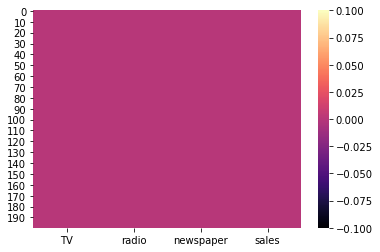

In [13]:
sns.heatmap(df.isnull(),cmap='magma')

By the heatmap we can see the clearly we don't have null values in data if we have null values in data it gives different shape in place of missing value

<AxesSubplot:xlabel='TV'>

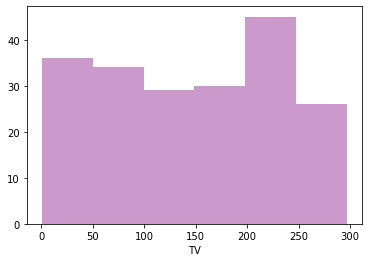

In [14]:
sns.distplot(a=df['TV'], kde=False,color='Purple')

distplot() displays a distrinution and range of a set of numeric values plotted against a dimension.

<AxesSubplot:xlabel='TV', ylabel='radio'>

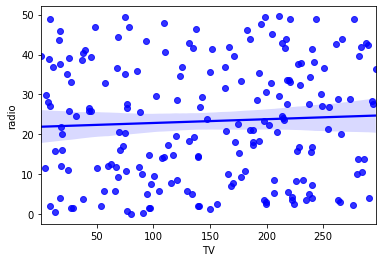

In [15]:
sns.regplot(x=df['TV'],y=df['radio'],color='Blue')

regplot shows that no. of mutual exclusive options for estimating the linear regression in both columns. But in the plot is showing that there is large difference in both columns

Scatter plots relationships between two numeric variables, the dots in a scatter plot not only report the values of individual data points,but also patterens when the data are taken as a whole, indentification of correlation relationship are common with scatter plots

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

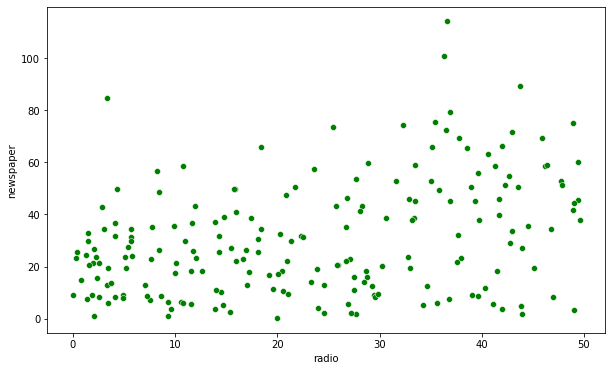

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['radio'], y=df['newspaper'],color='green')

#### joint plot

Thejoint plot give 2 answer in one plot

The histogram on the top shows the distribution of the variable at the x-axis and the histogram to the right shows the distribution of the variable at the y-axis. And the scatter plot shows the correlation between both variables

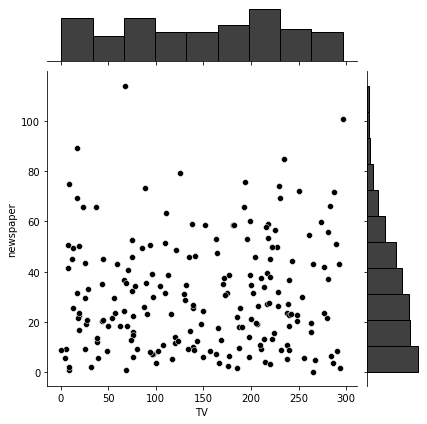

In [17]:
sns.jointplot(x=df['TV'],y=df['newspaper'],color='black')

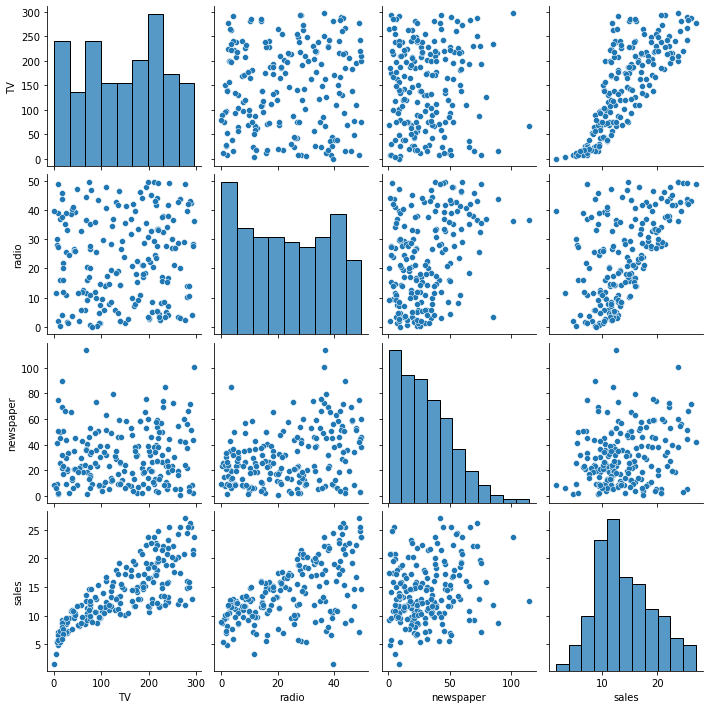

In [18]:
sns.pairplot(df)

## Check the correlation

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.This is when one variable increases while the other increases and visa versa

In [19]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

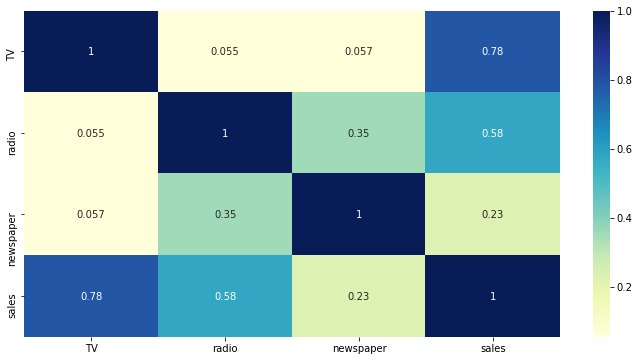

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='YlGnBu',annot=True)

Correlation coefficients quantify the association between variables or features of a dataset. good correlation rang is between 0.5 to 1

as per our data we have less correlation in newspaper

## check outlier

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Here we no need to plot Rings because it is a target variable

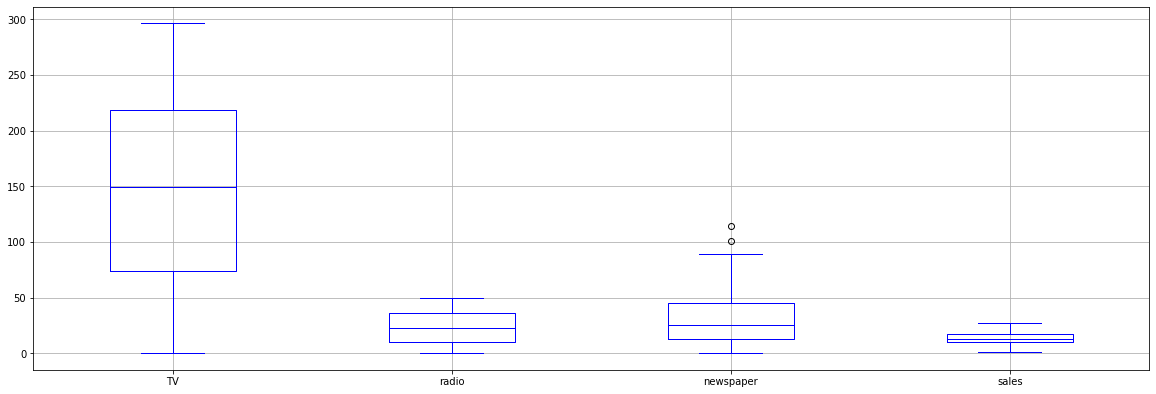

In [21]:
df.boxplot(figsize=(20,8),color='blue')
plt.subplots_adjust(bottom=0.25)
plt.show()

we have only 2 ouliers in newspaper but which are near to whisker 

## check skewness

In [22]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:xlabel='TV', ylabel='Density'>

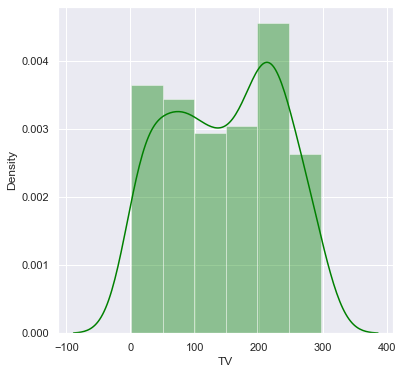

In [23]:
sns.set(style = "darkgrid")
plt.figure(figsize=(6,6))
sns.distplot(df['TV'],color='green')

In [24]:
df['TV']=np.log(1+df['TV'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

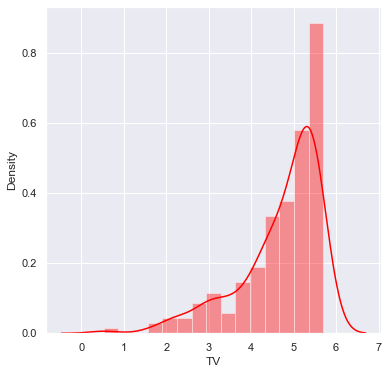

In [25]:
sns.set(style = "darkgrid")
plt.figure(figsize=(6,6))
sns.distplot(df['TV'],color='red')

<AxesSubplot:xlabel='radio', ylabel='Density'>

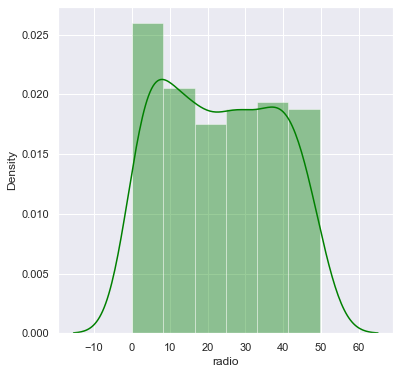

In [26]:
sns.set(style = "darkgrid")
plt.figure(figsize=(6,6))
sns.distplot(df['radio'],color='green')

In [27]:
df['radio']=np.log(1+df['radio'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

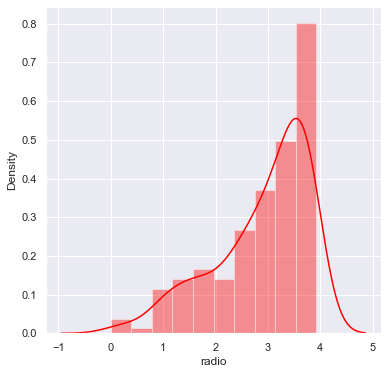

In [28]:
sns.set(style = "darkgrid")
plt.figure(figsize=(6,6))
sns.distplot(df['radio'],color='red')

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

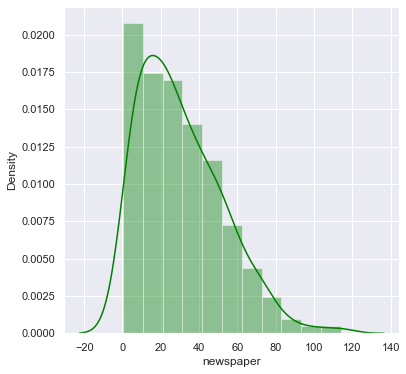

In [29]:
sns.set(style = "darkgrid")
plt.figure(figsize=(6,6))
sns.distplot(df['newspaper'],color='green')

### spliting features and target

In [30]:
x=df.drop('sales',axis=1)
y=df['sales']

In [31]:
x.shape

(200, 3)

In [32]:
y.shape

(200,)

In [33]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.9200678213661 on random_state 80


### train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=80)

In [35]:
x_train.shape

(180, 3)

In [36]:
x_test.shape

(20, 3)

In [37]:
y_train.shape

(180,)

In [38]:
y_test.shape

(20,)

## Model building

In [39]:
def train_n_score(model):
    print('model:',model)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print('explained_variance_score:',explained_variance_score(y_test,pred))
    scr=cross_val_score(model,x,y,cv=5)
    print("Cross validation score:",scr.mean())

In [40]:
def gcv(model):
    print('best_estimator',model.best_estimator_)
    print('best_score_',model.best_score_)
    # prediction on validation data
    model_pred= model.predict(x_test)
    print("accuracy of model :",r2_score(y_test,pred))

### Apply LinearRegression

In [41]:
train_n_score(LinearRegression())

model: LinearRegression()
r2_score: 0.9200678213661
mean_absolute_error: 1.4631391650193515
mean_squared_error: 2.795100395341668
explained_variance_score: 0.9202247638344406
Cross validation score: 0.8336360469439181


### Apply GridSearchCV to LinearRegression

In [42]:
parameters = {'fit_intercept':['bool',True]}
gcv_linear = GridSearchCV(LinearRegression(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_linear.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': ['bool', True]}, verbose=2)

In [43]:
gcv(gcv_linear)

best_estimator LinearRegression(fit_intercept='bool')
best_score_ 0.8183991572393996
accuracy of model : -1.1322676046085918


### Apply Lasso 

In [44]:
train_n_score(Lasso())

model: Lasso()
r2_score: 0.8155936650871263
mean_absolute_error: 2.1736443482802015
mean_squared_error: 6.448394481767333
explained_variance_score: 0.8158212932539732
Cross validation score: 0.7495838893413541


### Apply GridSearchCV to Lasso

In [45]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
gcv_lasso = GridSearchCV(Lasso(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=2)

In [46]:
gcv(gcv_lasso)

best_estimator Lasso(alpha=0.01)
best_score_ 0.8184473181219195
accuracy of model : -1.1322676046085918


### Apply Ridge

In [47]:
train_n_score(Ridge())

model: Ridge()
r2_score: 0.9197824453023378
mean_absolute_error: 1.4732360408333207
mean_squared_error: 2.805079539689733
explained_variance_score: 0.9199358826239913
Cross validation score: 0.8338820302061191


### Apply GridSearchCV  to Ridge

In [48]:
parameters = {"alpha":[1,2,5,10,15,20]}
gcv_ridge = GridSearchCV(Ridge(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5, 10, 15, 20]}, verbose=2)

In [49]:
gcv(gcv_ridge)

best_estimator Ridge(alpha=2)
best_score_ 0.8186100254677033
accuracy of model : -1.1322676046085918


### Apply DecisionTreeRegressor

In [50]:
train_n_score(DecisionTreeRegressor())

model: DecisionTreeRegressor()
r2_score: 0.9365427071298659
mean_absolute_error: 0.99
mean_squared_error: 2.219
explained_variance_score: 0.9365884627263472
Cross validation score: 0.9551626680367814


### Apply GridSearchCV for DecisionTreeRegressor

In [51]:
parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

gvc_dt=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,n_jobs=-1,cv=10,verbose=2)
gvc_dt.fit(x_train,y_train)

Fitting 10 folds for each of 1680 candidates, totalling 16800 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 6, 7],
                         'min_samples_split': [2, 5, 8, 10, 12, 18, 25]},
             verbose=2)

In [52]:
gcv(gvc_dt)

best_estimator DecisionTreeRegressor(max_depth=8, max_features='auto')
best_score_ 0.9483554881505574
accuracy of model : -1.1322676046085918


### Apply RandomForestRegressor

In [53]:
train_n_score(RandomForestRegressor())

model: RandomForestRegressor()
r2_score: 0.974109797703069
mean_absolute_error: 0.5840499999999988
mean_squared_error: 0.9053389499999989
explained_variance_score: 0.9743013827484244
Cross validation score: 0.9751116002603915


### Apply GridSearchCV for RandomForestRegressor

In [54]:
parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25]}

gcv_rf= GridSearchCV(RandomForestRegressor(),param_grid=parameters,n_jobs=-1,cv=8,verbose=2)

gcv_rf.fit(x_train,y_train)

Fitting 8 folds for each of 128 candidates, totalling 1024 fits


GridSearchCV(cv=8, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             verbose=2)

In [55]:
gcv(gcv_rf)

best_estimator RandomForestRegressor(criterion='mae', max_depth=25, n_estimators=700)
best_score_ 0.980121606136489
accuracy of model : -1.1322676046085918


### Apply ElasticNet

In [56]:
train_n_score(ElasticNet())

model: ElasticNet()
r2_score: 0.7005883573698968
mean_absolute_error: 2.787436950026092
mean_squared_error: 10.469946084146498
explained_variance_score: 0.7006134467801476
Cross validation score: 0.6598147802499073


### Apply GridSearchCV for ElasticNet

In [57]:
parameters = {"alpha":[1,2,5,10,15,20],'selection':['cyclic','random']}

gcv_en= GridSearchCV(ElasticNet(),param_grid=parameters,n_jobs=-1,cv=8,verbose=2)

gcv_en.fit(x_train,y_train)

Fitting 8 folds for each of 12 candidates, totalling 96 fits


GridSearchCV(cv=8, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5, 10, 15, 20],
                         'selection': ['cyclic', 'random']},
             verbose=2)

In [58]:
gcv(gcv_en)

best_estimator ElasticNet(alpha=1)
best_score_ 0.6390398121507437
accuracy of model : -1.1322676046085918


# conclusion

To conclued that which is the best model, We have to observe the diiference of r_2 score and cross validation score, which model has less difference that is the best model

after using different M/L algorithm it's clear that RandomForestRegressor giving the best accuracy so use it to predict the test data

## prediction values

as per the project statement,predcit the total sales values by the best model

In [59]:
mod=RandomForestRegressor()
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print('accuracy score:',r2_score(y_test,pred))

accuracy score: 0.9704003371615516


In [60]:
#prediction values
pred

array([18.767, 13.75 , 19.502, 16.85 , 24.865, 15.253,  8.449,  5.486,
       12.232, 18.543, 11.242, 20.176,  7.222, 20.123,  9.695, 15.342,
        6.319, 12.316,  9.885, 19.274])

### Saving the model

In [61]:
import joblib
joblib.dump(mod,"Advertising-project.pkl")

['Advertising-project.pkl']

## Loadig the saved model 

In [62]:
model=joblib.load("Advertising-project.pkl")

In [63]:
prediction=model.predict(x_test)

In [64]:
print(r2_score(y_test,prediction)*100)

97.04003371615516


In [65]:
prediction=pd.DataFrame(prediction) #converting into Data frame

In [66]:
prediction.to_csv("results.csv") #saving the predictions